# AS09p Youtube comment clustering

在AS06萃取關鍵字的練習中，我們曾使用反送中相關影片之留言共八千則作為範例。這次的作業將邀請你使用該筆資料，先篩檢關鍵字，再透過群集法，嘗試找出留言有哪些主題、立場、或者網民討論的面向等等。這次的作業是開放式的結果，也就是每個人所找出來的主題或立場等可能不太一樣，但目標是一致的，找出這些文本裡面有哪些主題、在討論什麼。這種問問題的方式其實也出現在不少專題組別中。你在寫作業的過程，應該會不斷地感受到，這怎麼抽得出來主題？這真的抽得出來嗎？這樣抽出來的主題有效嗎？有意義嗎？然後為了獲得能說服自己的主題，你可能會不斷反覆篩選這些留言，卻又會遇到對代表性的質疑，也就是，縮減到這麼小的資料集合，做出來的結果會有代表性嗎？

所以這個作業有個目的是先讓你透過做作業了解到，如果你做的專題是想回答「這些文本裡面有哪些主題」，很可能會遇到什麼樣的問題。

本週的作業程式碼無特殊規定，要怎麼處理這些資料，或者要怎麼解釋跑出來的東西，都讓同學自由發揮。唯獨需要回答你做了什麼樣的篩檢，還有繪製出視覺化的群集結果，和自我評估用群集來找主題是否有效。

## (TODO) Answer the following questions

### (TODO)Document filtering strategies
目前作業給的資料一共有8000筆留言，每筆留言的欄位有發佈時間、更新時間、按讚數、也可以計算留言的字數，請問你採用了什麼樣的篩選策略？請於以下的文字框回答（編輯下方Markdown，需說明至少五個連續處理過程）。這種過程的書寫通常會出現在論文或者研究報告中，或者出現在學術海報的一小塊paragraph。

（範例答案）
1. 原資料有8000筆留言
2. 篩除XX數不滿XX的留言後，剩下XXX筆留言
3. 篩除XX後不滿XX後，剩下X筆留言
4. ...
5. ...

### (TODO)Vocabulary filtering strategies
在教學範例中，我們介紹不少Strategy來篩選不必要或必要的文字，請問你怎麼做關鍵字篩選？

1. 原始資料有8000則留言
2. 篩掉數字、標點符號、英文與停用詞後，剩下14970個相異字詞。
3. 若一個字的詞也留下，剩下16523個相異字詞。
4. 過濾掉出現1%以上的字詞後，剩下14891個相異字詞（兩個字）

## Loading youtube data

### by colab

In [115]:
!wget https://github.com/P4CSS/PSS/blob/master/data/yt-comment-antiELAB.xlsx?raw=true -O yt-comment-antiELAB.xlsx
import pandas as pd
df = pd.read_excel('yt-comment-antiELAB.xlsx') 
df

--2021-12-19 13:25:27--  https://github.com/P4CSS/PSS/blob/master/data/yt-comment-antiELAB.xlsx?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/P4CSS/PSS/raw/master/data/yt-comment-antiELAB.xlsx [following]
--2021-12-19 13:25:28--  https://github.com/P4CSS/PSS/raw/master/data/yt-comment-antiELAB.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/yt-comment-antiELAB.xlsx [following]
--2021-12-19 13:25:28--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/yt-comment-antiELAB.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z
...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z


### by local notebook

## Feature selections - selecting Model

In [116]:
import jieba
df['token_text'] = df['textOriginal'].apply(lambda x:list(jieba.cut(x)))
df.head(20)

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,..."
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ..."
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,..."
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有..."
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]"
5,2_tXjqhbe5E,UgwStMgGuqJ4J60PfV94AaABAg,NaN,Makayla Kyo,按照節目規格外國來賓一律安排在坐在戴志揚大哥旁邊，不一樣的是上次是土耳其美女徐甘舒😆.......,0,2020-04-06T10:43:24Z,2020-04-06T10:43:24Z,"[按照, 節目規, 格外, 國來賓, 一律, 安排, 在, 坐在, 戴志揚, 大哥, 旁邊,..."
6,2_tXjqhbe5E,Ugyxd_mQmN0fV45p-kF4AaABAg,NaN,李珈霈,"武漢病毒真的讓人很傷腦筋,無恐不入，目前全世界傳染成這樣讓人感覺不知道如何是好，這個病毒何時...",1,2020-04-06T03:45:08Z,2020-04-06T03:45:08Z,"[武漢, 病毒, 真的, 讓, 人, 很, 傷腦, 筋, ,, 無恐, 不入, ，, 目前,..."
7,2_tXjqhbe5E,UgwKyJfCc7ObAGfJz3l4AaABAg,NaN,Roger Smith,"48:27 「手超過肩膀, 表示被污染了」...是什麼意思?",0,2020-04-05T08:35:49Z,2020-04-05T08:35:49Z,"[48, :, 27, , 「, 手超過, 肩膀, ,, , 表示, 被, 污染, 了,..."
8,2_tXjqhbe5E,UgzoUFkrsjRMiK-LQUp4AaABAg,NaN,Suen Gao,"oui, j'ai entendu dire que vous étiez extrêmem...",0,2020-04-05T02:54:31Z,2020-04-05T02:54:31Z,"[oui, ,, , j, ', ai, , entendu, , dire, , ..."
9,2_tXjqhbe5E,UgzCb94L8hXtZjxGH5h4AaABAg,NaN,Suen Gao,"oui, je regarde le spectacle tout le temps, ne...",0,2020-04-05T02:50:47Z,2020-04-05T02:50:47Z,"[oui, ,, , je, , regarde, , le, , spectacl..."


In [117]:
# get Stopwards
!wget -N https://raw.githubusercontent.com/P4CSS/PSS/master/data/stopwords_zh-tw.txt
with open("stopwords_zh-tw.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]

--2021-12-19 13:25:40--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/stopwords_zh-tw.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8125 (7.9K) [text/plain]
Saving to: ‘stopwords_zh-tw.txt’

stopwords_zh-tw.txt 100%[===================>]   7.93K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-12-19 13:25:40 (66.6 MB/s) - ‘stopwords_zh-tw.txt’ saved [8125/8125]



In [118]:
def removeAlpha(words): # for removing Alpha words
    out = []
    for word in words:
        if word.encode().isalpha() != True:
          out.append(word)
    return out

In [119]:
def remove_stopWords(words): # for removing stopwords
    out = []
    for word in words:
        if word not in stopwords:
            out.append(word)
    return out

In [120]:
import unicodedata # for removing Chinese puctuation
def removalPuncSpace(words):
    out = []
    for word in words:
        if unicodedata.category(word[0]).startswith('Lo'):
            out.append(word)
    return out

In [121]:
df['cleaned'] = df['token_text'].apply(remove_stopWords)
df['cleaned'] = df['cleaned'].apply(removeAlpha)
df['cleaned'] = df['cleaned'].apply(removalPuncSpace)
df[:10]

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cleaned
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,...","[鄭, 大哥, 吉雷米, 互動, 愛, 歡迎, 加入, 台灣, 溫馨, 家庭, 喔]"
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ...","[牛嘴, 掩, 這高雄, 老外, 台語, 能力, 應該, 台北人, 好]"
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,...","[客戶, 資料, 洩給, 中國, 現在, 紐約市, 已, 學生用, 這系, 統視, 訊, 課]"
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有...","[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行, 證]"
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]","[仆街, 鄭]"
5,2_tXjqhbe5E,UgwStMgGuqJ4J60PfV94AaABAg,NaN,Makayla Kyo,按照節目規格外國來賓一律安排在坐在戴志揚大哥旁邊，不一樣的是上次是土耳其美女徐甘舒😆.......,0,2020-04-06T10:43:24Z,2020-04-06T10:43:24Z,"[按照, 節目規, 格外, 國來賓, 一律, 安排, 在, 坐在, 戴志揚, 大哥, 旁邊,...","[節目規, 國來賓, 一律, 安排, 坐在, 戴志揚, 大哥, 旁邊, 不一樣, 上次, 土..."
6,2_tXjqhbe5E,Ugyxd_mQmN0fV45p-kF4AaABAg,NaN,李珈霈,"武漢病毒真的讓人很傷腦筋,無恐不入，目前全世界傳染成這樣讓人感覺不知道如何是好，這個病毒何時...",1,2020-04-06T03:45:08Z,2020-04-06T03:45:08Z,"[武漢, 病毒, 真的, 讓, 人, 很, 傷腦, 筋, ,, 無恐, 不入, ，, 目前,...","[武漢, 病毒, 真的, 人, 傷腦, 筋, 無恐, 不入, 目前, 全世界, 染成, 人,..."
7,2_tXjqhbe5E,UgwKyJfCc7ObAGfJz3l4AaABAg,NaN,Roger Smith,"48:27 「手超過肩膀, 表示被污染了」...是什麼意思?",0,2020-04-05T08:35:49Z,2020-04-05T08:35:49Z,"[48, :, 27, , 「, 手超過, 肩膀, ,, , 表示, 被, 污染, 了,...","[手超過, 肩膀, 表示, 污染, 意思]"
8,2_tXjqhbe5E,UgzoUFkrsjRMiK-LQUp4AaABAg,NaN,Suen Gao,"oui, j'ai entendu dire que vous étiez extrêmem...",0,2020-04-05T02:54:31Z,2020-04-05T02:54:31Z,"[oui, ,, , j, ', ai, , entendu, , dire, , ...",[]
9,2_tXjqhbe5E,UgzCb94L8hXtZjxGH5h4AaABAg,NaN,Suen Gao,"oui, je regarde le spectacle tout le temps, ne...",0,2020-04-05T02:50:47Z,2020-04-05T02:50:47Z,"[oui, ,, , je, , regarde, , le, , spectacl...",[]


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [" ".join(doc) for doc in df['cleaned']]
documents[:10]

['鄭 大哥 吉雷米 互動 愛 歡迎 加入 台灣 溫馨 家庭 喔',
 '牛嘴 掩 這高雄 老外 台語 能力 應該 台北人 好',
 '客戶 資料 洩給 中國 現在 紐約市 已 學生用 這系 統視 訊 課',
 '法國人 執行 居家 避疫 美國 比較 確實 外出 還要 通行 證',
 '仆街 鄭',
 '節目規 國來賓 一律 安排 坐在 戴志揚 大哥 旁邊 不一樣 上次 土耳其 美女 徐甘舒 吉雷米 反應 好 主持人 講台 語超 有趣 超愛 揪 古錐 欸 黃 醫師 好好 保持 健康 噢 謝謝 節目 提高 防疫 觀念 全台灣 醫療 人員們 謝謝 辛苦',
 '武漢 病毒 真的 人 傷腦 筋 無恐 不入 目前 全世界 染成 人 感覺 知道 如何是好 病毒 結束 行業 影響 如何是好 將來 感到 擔憂 害怕 擔心 孩子 將來 目前 充滿 號怎麼 談將 算 消沉 感覺 武漢 病毒 真的 恐怖 ㄟ 縮衣 節食 打算 少出 門多待 在家 會變 中國 流串 武漢 病毒 真的 有夠 毒 中國 研究 病毒 實在 有夠 毒',
 '手超過 肩膀 表示 污染 意思',
 '',
 '']

In [123]:
print(len(documents))

8000


In [124]:
# model 1
tfidf_model = TfidfVectorizer().fit(documents)
sparse_result = tfidf_model.transform(documents)
# print(sparse_result)
print(len(tfidf_model.vocabulary_))

14970


In [125]:
#  model 2
tfidf_model2 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b").fit(documents)
print(len(tfidf_model2.vocabulary_))
# tfidf_model2.vocabulary_

16523


In [126]:
# model 3
tfidf_model3 = TfidfVectorizer(max_df=0.01).fit(documents)  
# tfidf_model3.vocabulary_
print(len(tfidf_model3.vocabulary_))

14891


In [13]:
# model 4 bigrams
tfidf_model4 = TfidfVectorizer(ngram_range=(1,2), 
                              max_df=0.01).fit(documents)
print(len(tfidf_model4.vocabulary_))

50894


In [127]:
# choose model 3
X = tfidf_model3.transform(documents)
X.shape

(8000, 14891)

## Clustering

### Evaluating

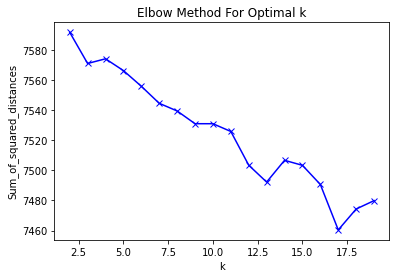

In [128]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Final clustering by k=?

In [130]:
true_k = 11
model = KMeans(n_clusters=true_k, 
               init='k-means++', 
               max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
df['cluster'] = labels
df
# X.shape

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cleaned,cluster
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,...","[鄭, 大哥, 吉雷米, 互動, 愛, 歡迎, 加入, 台灣, 溫馨, 家庭, 喔]",8
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ...","[牛嘴, 掩, 這高雄, 老外, 台語, 能力, 應該, 台北人, 好]",0
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,...","[客戶, 資料, 洩給, 中國, 現在, 紐約市, 已, 學生用, 這系, 統視, 訊, 課]",0
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有...","[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行, 證]",0
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]","[仆街, 鄭]",0
...,...,...,...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z,"[自己, 不是, 會算, 嗎]",[會算],0
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z,"[常德, 說, 的, 真, 好]","[常德, 說, 真, 好]",0
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z,"[自私, 的, 人, 多, 的, 是, ，, 水準, 就, 和, 中國人, 一樣]","[自私, 人, 水準, 中國人]",0
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z,"[人, 都, 自私自利, 的, ，, 適者, 生存, ，, 不, 適者, 自己, 想, 辦法...","[人, 自私自利, 適者, 生存, 適者, 想, 辦法, 有人, 幫, 最實]",8


## Visualization

視覺化是必要選項。

In [131]:
# TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
points = svd.fit_transform(X)
points[:20]

array([[ 0.00377344,  0.0104877 ],
       [ 0.00264647,  0.00766459],
       [ 0.0003807 ,  0.00103259],
       [ 0.0034759 ,  0.01237273],
       [ 0.00207512, -0.00019542],
       [ 0.00755846,  0.02571376],
       [ 0.00689152,  0.02291201],
       [ 0.00225631,  0.00790622],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.00054639,  0.00202269],
       [ 0.00385387,  0.01552519],
       [ 0.00494573,  0.01184129],
       [ 0.00244103,  0.00778236],
       [ 0.00847306,  0.01962525],
       [ 0.00203533,  0.00552626],
       [ 0.00513653,  0.01907124],
       [ 0.00791631,  0.02363011],
       [ 0.00461442,  0.00533921],
       [ 0.00259783,  0.00849752]])

In [25]:
# TSNE
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=0)
# points = tsne.fit_transform(X) 
# points[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 165.06207  ,   43.062813 ],
       [ 104.64268  ,  145.75151  ],
       [ 143.7954   ,  -80.06529  ],
       [ 139.58691  ,  -28.370195 ],
       [  11.298228 ,  143.61887  ],
       [  26.418484 ,  166.03471  ],
       [ 147.90985  ,   20.409737 ],
       [  85.88732  ,  113.63077  ],
       [   2.9903562,  -12.135166 ],
       [   2.9903562,  -12.135166 ],
       [-161.80133  ,   41.63351  ],
       [ 123.936325 ,  -87.82866  ],
       [ 147.99728  ,  -97.007324 ],
       [ -31.006952 , -134.10268  ],
       [ 135.63557  ,  114.80816  ],
       [  30.289726 ,  133.92747  ],
       [ -83.05652  , -149.31973  ],
       [ -58.93293  ,  125.93834  ],
       [ 129.82231  ,  108.2847   ],
       [ -91.961365 , -105.286736 ]], dtype=float32)

In [132]:
df_point = pd.DataFrame(points, columns = ['x', 'y'])
df_merge = pd.concat([df, df_point], axis='columns')
df_merge

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cleaned,cluster,x,y
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,...","[鄭, 大哥, 吉雷米, 互動, 愛, 歡迎, 加入, 台灣, 溫馨, 家庭, 喔]",8,3.773441e-03,1.048770e-02
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ...","[牛嘴, 掩, 這高雄, 老外, 台語, 能力, 應該, 台北人, 好]",0,2.646471e-03,7.664594e-03
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,...","[客戶, 資料, 洩給, 中國, 現在, 紐約市, 已, 學生用, 這系, 統視, 訊, 課]",0,3.807042e-04,1.032595e-03
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有...","[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行, 證]",0,3.475904e-03,1.237273e-02
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]","[仆街, 鄭]",0,2.075122e-03,-1.954157e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z,"[自己, 不是, 會算, 嗎]",[會算],0,-4.794048e-09,4.932484e-08
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z,"[常德, 說, 的, 真, 好]","[常德, 說, 真, 好]",0,8.749377e-03,5.393540e-02
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z,"[自私, 的, 人, 多, 的, 是, ，, 水準, 就, 和, 中國人, 一樣]","[自私, 人, 水準, 中國人]",0,5.340961e-03,9.697187e-03
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z,"[人, 都, 自私自利, 的, ，, 適者, 生存, ，, 不, 適者, 自己, 想, 辦法...","[人, 自私自利, 適者, 生存, 適者, 想, 辦法, 有人, 幫, 最實]",8,2.164891e-03,7.332920e-03


In [133]:
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

In [134]:
def generate_color(x, total):
    def color_red_blue(ctr, reverse=False):
        r = int(ctr*255)
        b = 255-int(ctr*255)
        if reverse:
            return "#%02x%02x%02x" % (b, 0, r)
        else:
            return "#%02x%02x%02x" % (r, 0, b)
    return color_red_blue(x/total)

print(generate_color(1, 6))

#2a00d5


In [135]:
p = figure(title = "doc clustering")


colors = df_merge['cluster'].apply(lambda x:generate_color(x, true_k))

from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, d3
palletes = d3['Category20'][true_k]
colors = [palletes[clu] for clu in df_merge['cluster']]
# print(colors)
p.circle(df_merge["x"], df_merge["y"], color = colors, fill_alpha=0.2, size=10)
show(p)

In [136]:
from collections import defaultdict, Counter
cdict = defaultdict(Counter)
for k, v in zip(df['cluster'], df['cleaned']):
    for word in v:
        cdict[k][word] += 1
for c in cdict:
    print(cdict[c].most_common(20))
    print("-"*80)

[('人', 422), ('香港', 207), ('說', 201), ('台灣', 128), ('好', 121), ('真的', 102), ('做', 95), ('醫師', 91), ('知道', 86), ('一個', 81), ('中國', 81), ('問題', 73), ('錢', 68), ('有人', 67), ('家庭', 65), ('黃', 65), ('好好', 64), ('想', 59), ('自由', 54), ('是不是', 51)]
--------------------------------------------------------------------------------
[('人', 1494), ('香港', 1293), ('台灣', 555), ('好', 539), ('說', 517), ('知道', 357), ('真的', 355), ('台湾', 352), ('说', 295), ('做', 279), ('你们', 265), ('大陆', 253), ('吗', 234), ('錢', 229), ('中国', 223), ('还', 212), ('想', 203), ('一個', 191), ('黃', 185), ('妳', 184)]
--------------------------------------------------------------------------------
[('香港', 254), ('人', 153), ('說', 86), ('好', 60), ('獨立', 60), ('反送', 58), ('中', 56), ('示威', 49), ('暴力', 47), ('警察', 46), ('美國', 41), ('中國', 40), ('討論', 37), ('台灣', 36), ('嘻嘻', 36), ('大好人', 36), ('做', 35), ('後', 33), ('兩個', 32), ('民意', 30)]
--------------------------------------------------------------------------------
[('多谢', 76), ('一直', 75), (

In [137]:
df1 = pd.DataFrame(list(cdict[0].most_common(5)), columns = ['word', 'n'])
df1

,word,n
0,人,1494
1,香港,1293
2,台灣,555
3,好,539
4,說,517


## (TODO) Explaining your results
從上述群集的結果，你觀察到有哪些留言群集？請評估你所找出來的關鍵字群集。

(Your Answer here)
在前述篩選策略下，從Evaluating的結果，我選擇以k=11作為群集數。
經視覺化每個群集的關鍵字後，一共發現以下幾大主題：
1. k=0: 主要關鍵字除了‘人’、‘香港’、‘台灣’以外還有’醫生‘，主題不太明確。
2. k=1: ‘人’、‘香港’、‘台灣’出現次數極高，但是主題難以辨識。
3. *k=2: 主要關鍵字出現‘獨立’、‘示威’、‘反送中’，主題明確，跟香港反送中有關。
4. k=3: 主要關鍵字有‘新疆’，且其他字詞多為簡體字，為中國人評論的群集，並與新疆議題相關。
5. k=4: 主要關鍵字是‘呵呵’與‘感覺’，但看不出太多相關性。
6. *k=5: 出現‘今日’和‘明日’，屬於「今日香港，明日台灣」等關於香港、台灣的討論。
7. *k=6: 主要關鍵字是‘暴徒’和‘警察’，討論香港反送中，使用‘暴徒’可知此群集的立場較偏中共。
8. k=7: 出現‘垃圾’與‘節目’，評論節目內容，負面態度為主。
9. *k=8: 核心關鍵字是‘劉真’，還有加油祝福的字眼，主題明確，是關於劉真的討論。＊
10. k=9: 主要關鍵字是‘運氣’、’台灣‘、‘總統’、‘團隊‘，應是討論台灣總統與政府團隊。
11. *k=10: 提到’填海‘、’港府‘，討論香港政府的政策。＊

我認為較顯著的群集是k=2, k=5 ,k=6, k=8, k=10，主要關鍵字都是非常明顯的名詞，例如‘反送中’、‘今日明日’、‘暴徒’、‘劉真’、‘填海’等等，所以出現專指一件事情或人物的字詞，通常就能提高群集的相關度與主題可辨識度。不過k=3雖出現‘新疆’這類高辨識度的主題詞，但其他字詞都沒什麼關聯，以致主題性就不太明顯。而k=0和k=1都是前幾名的字詞出現頻率高，但特徵不明確的群集，只能知道是討論香港、台灣、中國之間的事，無法看出確切主題，特別的是‘醫師’出現在其中有點突兀。k=4, k=7與k=9雖有‘呵呵’、‘垃圾’跟‘運氣‘這類較特別的高頻詞，但它不是專有名詞，沒有特定指向的人事物，所以群集主題也不明確。總體來說11群裡有5群為較明顯的群集，約2至3群有一點關聯，2至3群難辨識主題，此分類精準度尚可接受。

## Final Modification (if you have)
經觀察前述群集結果後，我篩除了XXX關鍵字，重新進行群集後所得到的結果為以下幾個主題，分別包含「XXXX（k=0, 1」、「XXXXX（k=2）」、「XXXXX（k=3, 4）」、「」
